<a href="https://colab.research.google.com/github/VitalyGladyshev/Math_Ess/blob/master/HW_2_%D0%93%D0%BB%D0%B0%D0%B4%D1%8B%D1%88%D0%B5%D0%B2%D0%92%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/Advertising.csv")
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [30]:
X = data[["TV", "radio", "newspaper"]].to_numpy()
n = data.shape[0]
y = np.array(data['sales'])
X[:3]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3]])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [31]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X[:3]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3]])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [32]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))
X[:3]

array([[0.07071068, 0.09561706, 0.09692057, 0.13052034],
       [0.07071068, 0.01849178, 0.10076663, 0.08506456],
       [0.07071068, 0.00714739, 0.11768927, 0.13070895]])

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [37]:
def coord_desc(X, y, iterations=1000):
    """
    Расчёт координатного спуска

    Возвращаем веса
    """
    n = X.shape[1]      # Количество признаков
    w = np.zeros(n)     # Веса

    for i in range(iterations):
        r = y - X@w

        for j in range(n):              # Для каждого веса
            prv = r + X[:, j] * w[j]
            w[j] = X[:, j]@prv          # Обновляем веса
            r = prv - X[:, j] * w[j]

    return w

weights = coord_desc(X, y, 1000)

print(f"Веса: {weights}")

Веса: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [41]:
X = data[["TV", "radio", "newspaper"]].to_numpy()

X_mean = X.mean()
X_std = X.std()

X = (X - X_mean) / X_std
X[:3]

array([[ 2.12559023, -0.37983282,  0.02926902],
       [-0.29254039, -0.36028974, -0.28472315],
       [-0.64822447, -0.27430018,  0.03057189]])

**Добавим единичный столбец**

In [42]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X[:3]

array([[ 1.        ,  2.12559023, -0.37983282,  0.02926902],
       [ 1.        , -0.29254039, -0.36028974, -0.28472315],
       [ 1.        , -0.64822447, -0.27430018,  0.03057189]])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [43]:
def mse_err(y, y_pred):
    """
    Вычисление Mean squared error (MSE)

    Возвращаем значение ошибки
    """

    return ((y - y_pred)**2).sum() / len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [50]:
y_mean = np.mean(y)
y_pred = np.array([y_mean] * len(y))

print(f"Прогноз средним: {mse_err(y, y_pred): .5}")

Прогноз средним:  27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [51]:
def lin_pred(X, w):
    """
    Получаем прогноз
    """

    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла)
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [53]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Реализация шага градиентного спуска

    Возвращаем: разницу между вектором весов и направлением изменения,
        умноженным на шаг градиентного спуска
    """

    y_pred = lin_pred(X[train_ind], w)  # предикт
    error = y_pred - y[train_ind]       # ошибка
    direction = X[train_ind] * 2 * error
    return w - direction * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [54]:
def stochastic_gradient_descent(X, y, w, eta=1e-3, eposh=1000, br=1e-5):
    """
    Реализация алгоритма стохастического градиентного спуска

    Возвращаем: вектор весов и вектор ошибок
    """

    errors_list = []
    dst = np.inf

    for ep in range(eposh):     # Чило эпох
        if dst <= br:           # Выход по сходимости
            break

        st_index = np.random.randint(len(y))                # Случайный индекс
        w_new = stoch_grad_step(X, y, w, st_index, eta)     # Выполняем итерацию спуска
        errors_list.append(mse_err(y, lin_pred(X, w_new)))  # Сохраняем значение ошибки
        dst = np.linalg.norm(w_new - w)                     # Определяем растояние
        w = w_new                                           # Обновляем веса

    return w, errors_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

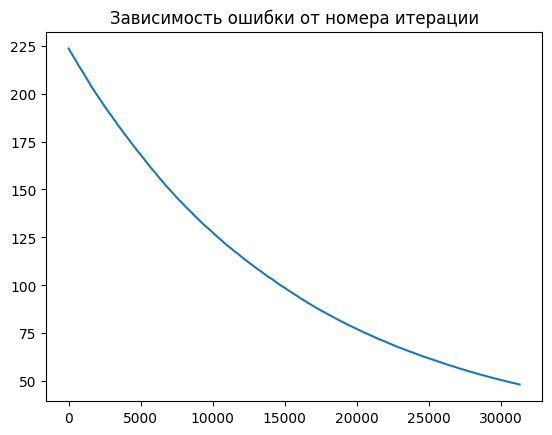

In [82]:
import matplotlib.pyplot as plt

w = np.zeros(X.shape[1])  # np.array([np.random.randint(1)] * X.shape[1])
w, errors_list = stochastic_gradient_descent(X, y, w, 1e-3, 100000, 1e-7)

plt.plot(errors_list)
plt.title("Зависимость ошибки от номера итерации")
plt.show();

**Выведите вектор весов, к которому сошелся метод.**

In [83]:
print(w)

[ 2.90002973  3.6116863  -1.47070381 -1.26536785]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [84]:
print(f"MSE  на последней итерации: {errors_list[-1]: .5}")

MSE  на последней итерации:  48.065


Выводы:
- Реализован алгоритм координатного. Результаты выполнения координатного спуска совпали с результатами полученными с помощью библиотеки sklearn (LinearRegression).
- Реализован проход алгоритмом стохастического градиентного спуска. Использована метрика Mean squared error (MSE). Построена кривая обучения. Выполнен подбор гиперпараметров